In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/SMSSpamCollection', sep='\t', header=None, names=['label', 'sentence'])

In [3]:
df.head()

,label,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,label,sentence
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby('label').describe().T

label                               ham  \
sentence count                     4825   
         unique                    4516   
         top     Sorry, I'll call later   
         freq                        30   

label                                                         spam  
sentence count                                                 747  
         unique                                                653  
         top     Please call our customer service representativ...  
         freq                                                    4

/Users/siro/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

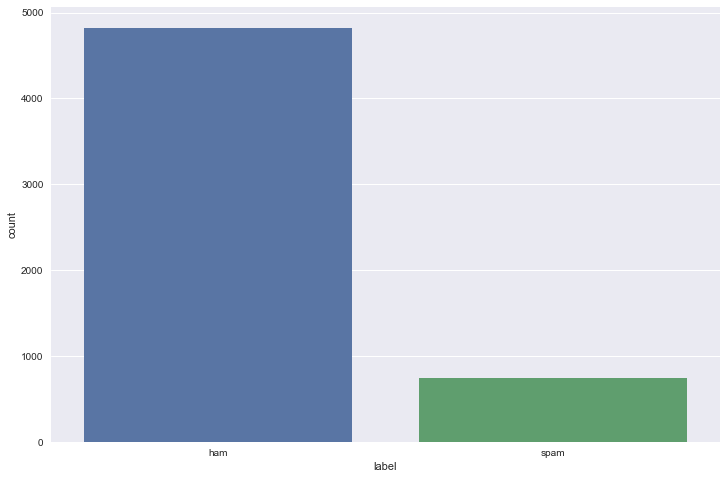

In [6]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
sns.countplot(df.label)

In [7]:
ham_msg = df[df.label=='ham']
spam_msg = df[df.label=='spam']

In [8]:
ham_msg_df = ham_msg.sample(n=len(spam_msg), random_state=1234)
spam_msg_df = spam_msg

ham_msg_df.shape, spam_msg_df.shape

((747, 2), (747, 2))

In [9]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)

/var/folders/gt/7y0tcygj491f_y94sg701tvc0000gn/T/ipykernel_59337/1154608761.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)


/Users/siro/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

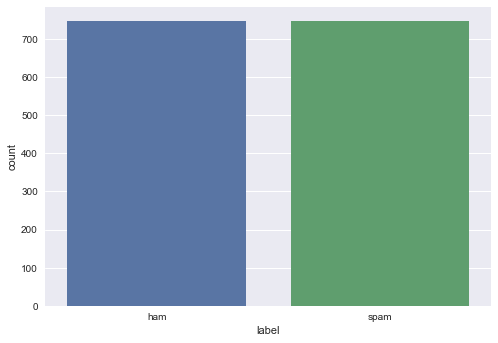

In [10]:
sns.countplot(msg_df.label)

In [11]:
msg_df['msg_type'] = msg_df.label.map({'ham': 0, 'spam': 1})

In [12]:
msg_df.head()

,label,sentence,msg_type
0,ham,She went to attend another two rounds today..b...,0
1,ham,In which place i can get rooms cheap:-),0
2,ham,"She was supposed to be but couldn't make it, s...",0
3,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...,0
4,ham,Also that chat was awesome but don't make it r...,0


In [13]:
from sklearn.utils import shuffle

shuffle(msg_df).reset_index(drop=True)

,label,sentence,msg_type
0,ham,Be happy there. I will come after noon,0
1,spam,You are a £1000 winner or Guaranteed Caller Pr...,1
2,ham,Huh so early.. Then ü having dinner outside iz...,0
3,spam,URGENT! This is the 2nd attempt to contact U!U...,1
4,spam,Please CALL 08712402578 immediately as there i...,1
...,...,...,...
1489,ham,We r outside already.,0
1490,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...,1
1491,ham,Ok. Me watching tv too.,0
1492,spam,"Did you hear about the new ""Divorce Barbie""? I...",1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(msg_df.sentence, msg_df.msg_type.values, test_size=0.2, random_state=34)

In [15]:
X_train

583     Lol. Well quality aint bad at all so i aint co...
105     Is it ok if I stay the night here? Xavier has ...
413     Goodmorning today i am late for  &lt;DECIMAL&g...
329     Guess who spent all last night phasing in and ...
375     Yup... Hey then one day on fri we can ask miwa...
                              ...                        
324                Am i that much bad to avoid like this?
1109    8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
490     Awesome question with a cute answer: Someone a...
1146    Sorry! U can not unsubscribe yet. THE MOB offe...
1441         PRIVATE! Your 2003 Account Statement for 078
Name: sentence, Length: 1195, dtype: object

In [16]:
max_len = 100
trunc_type = 'post'
pad_type ='post'
oov_tok = '<OOV>'
vocab_size = 500

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [19]:
word2idx = tokenizer.word_index
print(len(word2idx))

4112


In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = tokenizer.texts_to_sequences(X_train)

In [21]:
train_seq_padded = pad_sequences(train_seq, maxlen=max_len, padding=pad_type, truncating=trunc_type)

In [22]:
test_seq = tokenizer.texts_to_sequences(X_test)
test_seq_padded = pad_sequences(test_seq, maxlen=max_len, padding=pad_type, truncating=trunc_type)

In [23]:
train_seq_padded.shape, test_seq_padded.shape

((1195, 100), (299, 100))

In [25]:
embeding_dim = 16
drop_value = 0.2
n_dense = 24

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length=max_len ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(n_dense, activation='relu'),
    tf.keras.layers.Dropout(drop_value),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-03 20:48:20.697659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-03 20:48:20.698022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [74]:
y_train

583      ham
105      ham
413      ham
329      ham
375      ham
        ... 
324      ham
1109    spam
490      ham
1146    spam
1441    spam
Name: label, Length: 1195, dtype: object

In [76]:
n_epochs = 30

history = model.fit(train_seq_padded, y_train, epochs=n_epochs, validation_data=(test_seq_padded, y_test), verbose=2)

Epoch 1/30


2022-04-03 20:52:32.060974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 - 2s - loss: 0.6906 - acc: 0.5280 - val_loss: 0.6879 - val_acc: 0.4849 - 2s/epoch - 45ms/step
Epoch 2/30


2022-04-03 20:52:33.596165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 - 1s - loss: 0.6838 - acc: 0.5305 - val_loss: 0.6785 - val_acc: 0.6020 - 522ms/epoch - 14ms/step
Epoch 3/30
38/38 - 1s - loss: 0.6713 - acc: 0.6778 - val_loss: 0.6600 - val_acc: 0.8060 - 513ms/epoch - 14ms/step
Epoch 4/30
38/38 - 0s - loss: 0.6421 - acc: 0.7983 - val_loss: 0.6190 - val_acc: 0.8763 - 498ms/epoch - 13ms/step
Epoch 5/30
38/38 - 0s - loss: 0.5925 - acc: 0.8268 - val_loss: 0.5626 - val_acc: 0.9030 - 494ms/epoch - 13ms/step
Epoch 6/30
38/38 - 0s - loss: 0.5261 - acc: 0.8678 - val_loss: 0.4884 - val_acc: 0.8997 - 498ms/epoch - 13ms/step
Epoch 7/30
38/38 - 0s - loss: 0.4546 - acc: 0.8946 - val_loss: 0.4149 - val_acc: 0.9064 - 496ms/epoch - 13ms/step
Epoch 8/30
38/38 - 0s - loss: 0.3913 - acc: 0.9105 - val_loss: 0.3511 - val_acc: 0.9164 - 492ms/epoch - 13ms/step
Epoch 9/30
38/38 - 0s - loss: 0.3353 - acc: 0.9172 - val_loss: 0.2989 - val_acc: 0.9365 - 493ms/epoch - 13ms/step
Epoch 10/30
38/38 - 0s - loss: 0.2922 - acc: 0.9155 - val_loss: 0.2603 - val_acc: 0.9298 - 496ms/ep

In [78]:
model.evaluate(test_seq_padded, y_test)

10/10 [==============================] - 0s 6ms/step - loss: 0.0746 - acc: 0.9699


[0.07457628101110458, 0.9698996543884277]

In [91]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

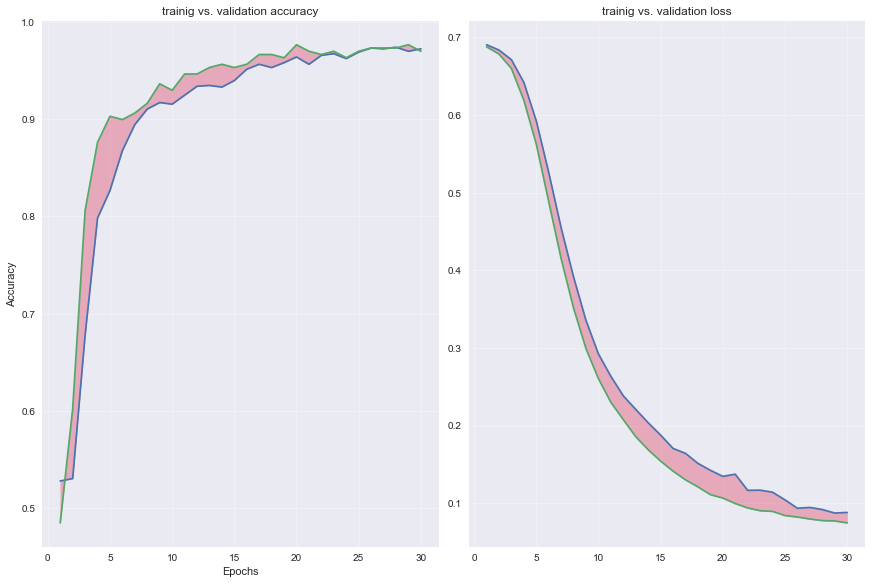

In [98]:
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 8))
plt.style.use('seaborn')

ax[0].plot(epochs, acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('trainig vs. validation accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs', ylabel='Accuracy')

ax[1].plot(epochs, loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('trainig vs. validation loss')
ax[1].fill_between(epochs, loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs', ylabel='Accuracy')